Mounted at /content/drive

File path........: /content/drive/My Drive/2014_2014-03-25-08-35-37_1.dcm

Patient's Name...: CompressedSamples, CT1
Patient ID.......: N/A
Modality.........: US
Study Date.......: 20140325
Image size.......: 904 x 1208
Pixel Spacing....: [0.014979, 0.015000]
Slice location...: (missing)


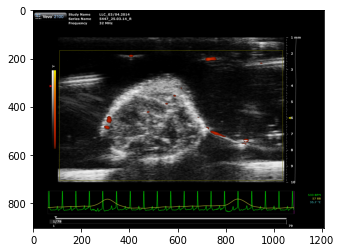

In [ ]:
"""

open a DICOM file, print some dataset
information, and show it using matplotlib

"""

# authors : Guillaume Lemaitre <g.lemaitre58@gmail.com>
# license : MIT

from google.colab import drive
drive.mount('/content/drive')
#"/content/drive/My Drive/2014_2014-03-25-08-35-37_1.dcm"

import matplotlib.pyplot as plt
!pip install pydicom
from pydicom import dcmread
from pydicom.data import get_testdata_file

fpath = r"/content/drive/My Drive/2014_2014-03-25-08-35-37_1.dcm"
ds = dcmread((fpath), force=True)

# Normal mode:
print()
print(f"File path........: {fpath}")
print()

pat_name = ds.PatientName

print(f"Patient's Name...: {display_name}")
print(f"Patient ID.......: {ds.PatientID}")
print(f"Modality.........: {ds.Modality}")
print(f"Study Date.......: {ds.StudyDate}")
print(f"Image size.......: {ds.Rows} x {ds.Columns}")
print(f"Pixel Spacing....: {ds.PixelSpacing}")


print(f"Slice location...: {ds.get('SliceLocation', '(missing)')}")

plt.imshow(ds.pixel_array[0,:,:,:], cmap=plt.cm.gray)
plt.show()

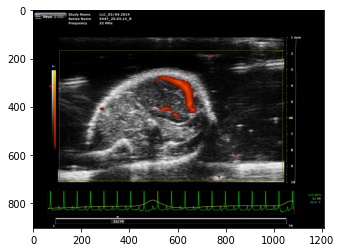

In [ ]:
plt.imshow(ds.pixel_array[21,:,:,:], cmap=plt.cm.gray)

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pydicom
from pydicom.encaps import encapsulate
from pydicom.uid import JPEG2000
from imagecodecs import jpeg2k_encode

file_list = [f.path for f in os.scandir(basepath)]
ds = pydicom.dcmread(file_list[0])
arr = ds.pixel_array
#Need to copy() to meet jpeg2k_encodes C contiguous requirement
arr_crop = arr[500:1500,500:1500].copy() 
# jpeg2k_encode to perform JPEG2000 compression
arr_jpeg2k = jpeg2k_encode(arr_crop)
# convert from bytearray to bytes before saving to PixelData
arr_jpeg2k = bytes(arr_jpeg2k)
ds.Rows = arr_crop.shape[0]
ds.Columns = arr_crop.shape[1]
ds.PixelData = encapsulate([arr_jpeg2k])
outputpath = os.path.join(basepath, "test.dcm")
ds.save_as(outputpath)

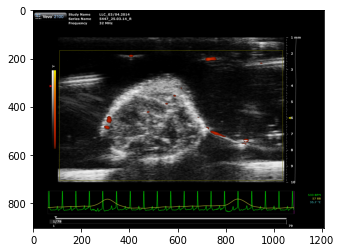

In [ ]:
#https://gist.github.com/somada141/8dd67a02e330a657cf9e

!pip install pydicom
import pydicom as dicom
import os
import numpy

PathDicom = r"/content/drive"

lstFilesDCM = []  # create an empty list
for dirName, subdirList, fileList in os.walk(PathDicom):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))
            
# Get ref file
RefDs = dicom.read_file(lstFilesDCM[0])

RefDs = dicom.read_file("/content/drive/My Drive/2014_2014-03-25-08-35-37_1.dcm")
# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), len(lstFilesDCM))

# Load spacing values (in mm)
#ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]), float(RefDs.SliceThickness))

# array sized based on 'ConstPixelDims'
ArrayDicom = numpy.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
rd = ArrayDicom.reshape(904, 1208)
rd.shape

# loop through all the DICOM files
for filenameDCM in lstFilesDCM:
    # read the file
    ds = dicom.read_file(filenameDCM)
    # store the raw image data
    plt.imshow(ds.pixel_array[0,:,:,:], cmap=plt.cm.gray)
    #ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array
    #rd[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array

In [ ]:
from PIL import Image
A=ds.pixel_array[0,:,:,:]
im = Image.fromarray(A)
im.save("saved_slice.jpeg")